## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CC GENERAL.csv to CC GENERAL.csv


Reading the dataset into a DataFrame

In [ ]:
df = pd.read_csv("CC GENERAL.csv")

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df = df.fillna(0)

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df = pd.get_dummies(df)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

Text(0, 0.5, ' Sum of Squared Distances')

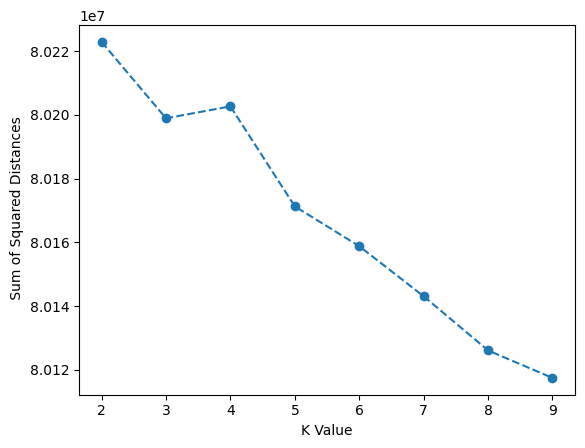

In [ ]:
from sklearn.cluster import KMeans
ssd = []

for k in range(2,10):

    model = KMeans(n_clusters=k)


    model.fit(scaled_df)

    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [1]:
#The normal method to fing the optimim k "sum pf squared distnances" wasn't very informative with this data set.
# No clear elbow was shown to clearly distinguish the optimum K. As a result, another method needed to be used,
# which is using the silhouette scores



Sil score for k=2: 0.0006
Sil score for k=3: 0.0004
Sil score for k=4: 0.0001
Sil score for k=5: -0.0000
Sil score for k=6: 0.0000
Sil score for k=7: -0.0000
Sil score for k=8: 0.0000
Sil score for k=9: 0.0000
Sil score for k=10: 0.0000


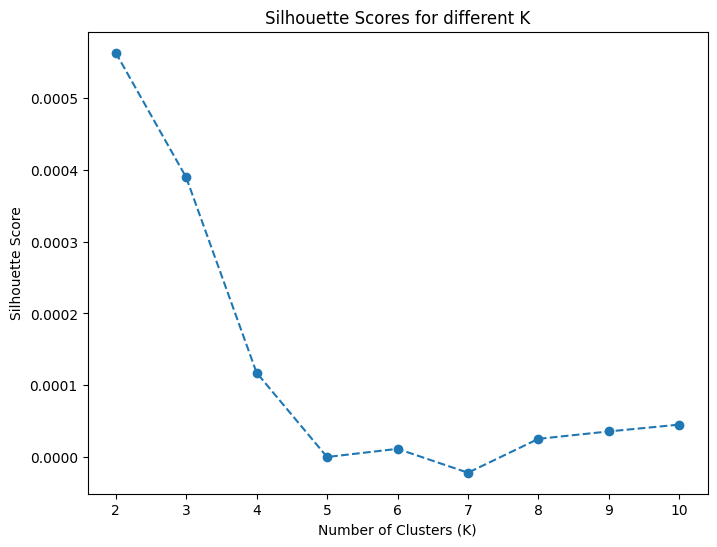

The optimal number of clusters (K) is: 2


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
K_range = range(2, 11)  # Test values of K from 2 to 10

# Step 4: Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    labels = kmeans.labels_

    # Calculate silhouette score for the current K
    score = silhouette_score(scaled_df, labels)
    print(f"Sil score for k={k}: {score:.4f}")
    silhouette_scores.append(score)

# Step 5: Plot silhouette scores to visualize the best K
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Step 6: Find the optimal K (maximum silhouette score)
optimal_K = K_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters (K) is: {optimal_K}")

Choose the optimal K and calculate the silhouette score for the best model.

In [ ]:
# As can be shown from plotting the possible K values and their silhouttes scores,
# k=2 had the best silhouette score, making it the optimum number of clusters
# Since this dataset is about credit card customer behavior, it's possible that the data naturally separates into two major groups, such as:
# Low spenders vs. High spenders
# Revolving credit users vs. Full payers

Sil score for k=10: 0.0000


## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage = "average")
cluster_labels = model.fit_predict(scaled_df)
f=silhouette_score(scaled_df, cluster_labels)
print(f)

0.03027293328292119


In [ ]:
model = AgglomerativeClustering(n_clusters=2, metric="manhattan", linkage = "single")
cluster_labels = model.fit_predict(scaled_df)
f=silhouette_score(scaled_df, cluster_labels)
print(f)

0.026827062033139136


Choose the optimal K and calculate the silhouette score for the best model.

In [ ]:
# For agglomerative clustring, K was kept as 2, and the affinity and linkage were tested. 2 cases were chosen for simplicity, and the one with the highest silhouette score was chosen
# For k=2, when affinity and linkage were chosen to be euclidean and average respectively, silhouette score was better= 0.03027293328292119

## DBSCAN

Find the optimal DBSCAN model.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define a range for eps and min_samples
eps_range = np.linspace(100, 200, 10)  # Increase upper bound for better clustering
num_features = 36  # Given feature size
min_samples_range = [5, 7 , 9 , 2, 36]  # Adjusted min_samples to be around half of feature size

best_score = -1
best_eps = None
best_min_samples = None

# Loop through different values of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        labels = dbscan.fit_predict(scaled_df)

        noise_ratio = (labels == -1).sum() / len(labels)  # Calculate noise percentage
        num_clusters = len(set(labels) - {-1})  # Exclude noise label (-1)

        print(f"eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {num_clusters}, Noise: {noise_ratio:.2%}")

        # Only evaluate models with more than 1 cluster
        if num_clusters > 1:
            score = silhouette_score(scaled_df, labels)
            print(f"Silhouette Score: {score:.4f}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps: {best_eps} with best min_samples: {best_min_samples} and silhouette score: {best_score}')



eps: 100.00, min_samples: 5, Clusters: 0, Noise: 100.00%
eps: 100.00, min_samples: 7, Clusters: 0, Noise: 100.00%
eps: 100.00, min_samples: 9, Clusters: 0, Noise: 100.00%
eps: 100.00, min_samples: 2, Clusters: 0, Noise: 100.00%
eps: 100.00, min_samples: 36, Clusters: 0, Noise: 100.00%
eps: 111.11, min_samples: 5, Clusters: 0, Noise: 100.00%
eps: 111.11, min_samples: 7, Clusters: 0, Noise: 100.00%
eps: 111.11, min_samples: 9, Clusters: 0, Noise: 100.00%
eps: 111.11, min_samples: 2, Clusters: 0, Noise: 100.00%
eps: 111.11, min_samples: 36, Clusters: 0, Noise: 100.00%
eps: 122.22, min_samples: 5, Clusters: 0, Noise: 100.00%
eps: 122.22, min_samples: 7, Clusters: 0, Noise: 100.00%
eps: 122.22, min_samples: 9, Clusters: 0, Noise: 100.00%
eps: 122.22, min_samples: 2, Clusters: 0, Noise: 100.00%
eps: 122.22, min_samples: 36, Clusters: 0, Noise: 100.00%
eps: 133.33, min_samples: 5, Clusters: 0, Noise: 100.00%
eps: 133.33, min_samples: 7, Clusters: 0, Noise: 100.00%
eps: 133.33, min_samples: 9,

In [ ]:
# as can be seen, the data seems to be very sparse. any epsilon before 144 gave 0 clusters, and all data sets were calssified as outliers.
# Once epsillon exceeded 140, all data were grouped in one cluster, which is not a solution either

Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define a range for eps and min_samples
eps_range = np.linspace(133, 150, 10)  # Increase upper bound for better clustering
num_features = 36  # Given feature size
min_samples_range = [7 , 9]  # Adjusted min_samples to be around half of feature size

best_score = -1
best_eps = None
best_min_samples = None

# Loop through different values of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        labels = dbscan.fit_predict(scaled_df)

        noise_ratio = (labels == -1).sum() / len(labels)  # Calculate noise percentage
        num_clusters = len(set(labels) - {-1})  # Exclude noise label (-1)

        print(f"eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {num_clusters}, Noise: {noise_ratio:.2%}")

        # Only evaluate models with more than 1 cluster
        if num_clusters > 1:
            score = silhouette_score(scaled_df, labels)
            print(f"Silhouette Score: {score:.4f}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps: {best_eps} with best min_samples: {best_min_samples} and silhouette score: {best_score}')



eps: 133.00, min_samples: 7, Clusters: 0, Noise: 100.00%
eps: 133.00, min_samples: 9, Clusters: 0, Noise: 100.00%
eps: 134.89, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 134.89, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 136.78, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 136.78, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 138.67, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 138.67, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 140.56, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 140.56, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 142.44, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 142.44, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 144.33, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 144.33, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 146.22, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 146.22, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 148.11, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 148.11, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 1

In [3]:
# Testing the fineline between 100% noise and 0% noise further, in hopes of finding an intermediate epsilon that works
# but still, behaviour didn't change. The data appears to be sparse, making it hard for DBSCAN to detect meaningful density-based clusters.
# this suggests that DBSCAN may not be the right clustering method for this dataset.

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?

In [ ]:
# K-Means was chosen as the best model because it provided the clearest cluster separation based on the silhouette score.
# DBSCAN was not effective due to the sparse nature of the data, causing either 100% noise or a single large cluster.
# The data appears to be well-suited for partition-based clustering (K-Means, Agglomerative) but not for density-based clustering (DBSCAN).
# The fact that only 2 clusters were optimal suggests that customers in the dataset have two major spending behavior patterns.
# DBSCAN’s failure implies that there is no natural density variation in the dataset that can be leveraged.